# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [33]:
import pandas as pd
data = pd.read_csv("blackfriday.csv", index_col = 0)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [35]:
# 결측치의 비율을 확인합니다.
data.isnull().sum() / len(data)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.306723
Product_Category_3            0.691076
Purchase                      0.000000
dtype: float64

## 1. 전처리

In [36]:
# 두 변수에 결측치가 존재하는데 비율이 높습니다.
# 따라서 둘다 제거합니다.
# 또한 필요 없는 변수도 같이 제거합니다.
data.drop(["User_ID","Product_ID","Product_Category_2", "Product_Category_3"],axis = 1, inplace=True)
data.isnull().sum() / len(data)

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Purchase                      0.0
dtype: float64

In [37]:
# 결측치가 있는 변수를 제거하였고
# 기초통계량을 구합니다. 
data.describe()

,Occupation,Marital_Status,Product_Category_1,Purchase
count,4998.000000,4998.000000,4998.000000,4998.000000
mean,8.036815,0.421369,5.320128,9234.655462
std,6.442697,0.493828,3.912281,4999.225081
min,0.000000,0.000000,1.000000,13.000000
25%,2.000000,0.000000,1.000000,5497.750000
50%,7.000000,0.000000,5.000000,8049.000000
75%,14.000000,1.000000,8.000000,12039.000000
max,20.000000,1.000000,20.000000,23913.000000


In [38]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,3,0,5,2010
1,F,0-17,10,A,1,0,7,4483
2,F,0-17,10,A,1,0,1,7696
3,F,0-17,10,A,3,0,2,16429
4,F,0-17,10,A,3,0,3,5780


In [39]:
# 데이터를 쫌 더 살펴봅니다.
# unique value를 봅니다.

for i in data.columns:
    print(f"{i} :{len(data[str(i)].unique())} {data[str(i)].unique()}")

Gender :2 ['F' 'M']
Age :7 ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Occupation :21 [10  2  0 19  1  7 12  8  4  9  3 20 15 14 16 17  5  6 11 18 13]
City_Category :3 ['A' 'B' 'C']
Stay_In_Current_City_Years :5 ['3' '1' '2' '4+' '0']
Marital_Status :2 [0 1]
Product_Category_1 :20 [ 5  7  1  2  3  8 16 14 10 19 11 12  4 17 15  6 13 20 18  9]
Purchase :3736 [ 2010  4483  7696 ... 11701  2045  1413]


In [40]:
for i in data.columns:
    print(f"{i} :{len(data[str(i)].unique())} {data[str(i)].value_counts()}")

Gender :2 M    3765
F    1233
Name: Gender, dtype: int64
Age :7 26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64
Occupation :21 4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64
City_Category :3 B    2102
C    1555
A    1341
Name: City_Category, dtype: int64
Stay_In_Current_City_Years :5 1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: int64
Marital_Status :2 0    2892
1    2106
Name: Marital_Status, dtype: int64
Product_Category_1 :20 5     1407
1     1285
8      995
2      227
11     206
3      193
6      193
4      107
16      78
15      57
13      43
10      41
7       40
12      31
20      31
19      20
14      19
18      18
17       6
9        1
Name: Product_Category_1, dty

In [41]:
# Purchase를 제외한 모든 변수 즉, 모든 설명변수는 categorical입니다. 
# 따라서 one hot encoding을 해 줍니다.  
for i in data.columns:
    if i != "Purchase" and i !=  "Marital_Status":
        one_hot = pd.get_dummies(data[str(i)], prefix = str(i), drop_first = True)*1.0  # float으로 만들어 주기 위해
        data = pd.concat([pd.DataFrame(data), one_hot],axis=1)
        data.drop([str(i)],axis = 1, inplace=True)


for i in data.columns:
    print(f"{i}")

Marital_Status
Purchase
Gender_M
Age_18-25
Age_26-35
Age_36-45
Age_46-50
Age_51-55
Age_55+
Occupation_1
Occupation_2
Occupation_3
Occupation_4
Occupation_5
Occupation_6
Occupation_7
Occupation_8
Occupation_9
Occupation_10
Occupation_11
Occupation_12
Occupation_13
Occupation_14
Occupation_15
Occupation_16
Occupation_17
Occupation_18
Occupation_19
Occupation_20
City_Category_B
City_Category_C
Stay_In_Current_City_Years_1
Stay_In_Current_City_Years_2
Stay_In_Current_City_Years_3
Stay_In_Current_City_Years_4+
Product_Category_1_2
Product_Category_1_3
Product_Category_1_4
Product_Category_1_5
Product_Category_1_6
Product_Category_1_7
Product_Category_1_8
Product_Category_1_9
Product_Category_1_10
Product_Category_1_11
Product_Category_1_12
Product_Category_1_13
Product_Category_1_14
Product_Category_1_15
Product_Category_1_16
Product_Category_1_17
Product_Category_1_18
Product_Category_1_19
Product_Category_1_20


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 4998 non-null   int64  
 1   Purchase                       4998 non-null   int64  
 2   Gender_M                       4998 non-null   float64
 3   Age_18-25                      4998 non-null   float64
 4   Age_26-35                      4998 non-null   float64
 5   Age_36-45                      4998 non-null   float64
 6   Age_46-50                      4998 non-null   float64
 7   Age_51-55                      4998 non-null   float64
 8   Age_55+                        4998 non-null   float64
 9   Occupation_1                   4998 non-null   float64
 10  Occupation_2                   4998 non-null   float64
 11  Occupation_3                   4998 non-null   float64
 12  Occupation_4                   4998 non-null   f

In [43]:
X = data.drop(['Purchase'], axis = 1)     # 설명변수
y = data.Purchase     # Target

In [44]:
from sklearn.model_selection import train_test_split
# test와 train으로 나누어 줍니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
print(X_train.shape)
print(X_test.shape)

(3498, 53)
(1500, 53)


## 2. KNN - euclidean

100%|██████████| 30/30 [00:15<00:00,  1.89it/s]


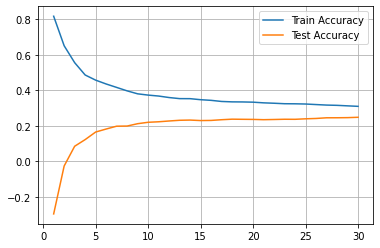

In [45]:
from sklearn.neighbors import KNeighborsRegressor, DistanceMetric, NearestNeighbors
from tqdm import tqdm
k_range = range(1, 31) # 계산해볼 K의 후보입니다.
train_accuracy = []
test_accuracy = []

for k in tqdm(range(1, 31)):   # 후보 K를 iterate하면서 train과 test의 score를 저장합니다. 
    model = KNeighborsRegressor(n_neighbors = k)   # 유클리드 거리 입니다
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))     
    test_accuracy.append(model.score(X_test, y_test))     
    
# 시각화

import matplotlib.pyplot as plt

plt.plot(k_range, train_accuracy, label = "Train Accuracy")
plt.plot(k_range, test_accuracy, label = "Test Accuracy")

plt.grid()
plt.legend()
plt.show()

In [46]:
# test와 train둘다 고려하여 K를결정합니다.

train_rank_15 = pd.Series(train_accuracy).sort_values(ascending = False).index[:15]
test_rank_15 = pd.Series(test_accuracy).sort_values(ascending = False).index[:15]

print(train_rank_15)
print(test_rank_15)
print()
print(train_rank_15.intersection(test_rank_15))     

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
Int64Index([29, 28, 27, 26, 25, 24, 17, 22, 18, 23, 19, 21, 20, 16, 13], dtype='int64')

Int64Index([13], dtype='int64')


## 2. KNN - Manhattan

100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


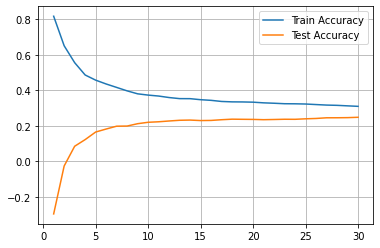

In [47]:
k_range = range(1, 31) # 계산해볼 K의 후보입니다.
train_accuracy = []
test_accuracy = []

for k in tqdm(range(1, 31)):   # 후보 K를 iterate하면서 train과 test의 score를 저장합니다. 
    model = KNeighborsRegressor(n_neighbors = k, p=1, metric = "manhattan")   # 맨허튼거리입니다.
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))     
    test_accuracy.append(model.score(X_test, y_test))     
    
# 시각화

import matplotlib.pyplot as plt

plt.plot(k_range, train_accuracy, label = "Train Accuracy")
plt.plot(k_range, test_accuracy, label = "Test Accuracy")

plt.grid()
plt.legend()
plt.show()

In [48]:
# test와 train둘다 고려하여 K를결정합니다.

train_rank_15_ = pd.Series(train_accuracy).sort_values(ascending = False).index[:15]
test_rank_15_ = pd.Series(test_accuracy).sort_values(ascending = False).index[:15]

print(train_rank_15_)
print(test_rank_15_)
print()
print(train_rank_15_.intersection(test_rank_15_))     

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
Int64Index([29, 28, 27, 26, 25, 24, 17, 22, 18, 23, 19, 21, 20, 16, 13], dtype='int64')

Int64Index([13], dtype='int64')
